<a href="https://colab.research.google.com/github/MARCOBRAYANGONZALEZGONZALEZ/EDP-I-EJERCICIOS-/blob/main/Series_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

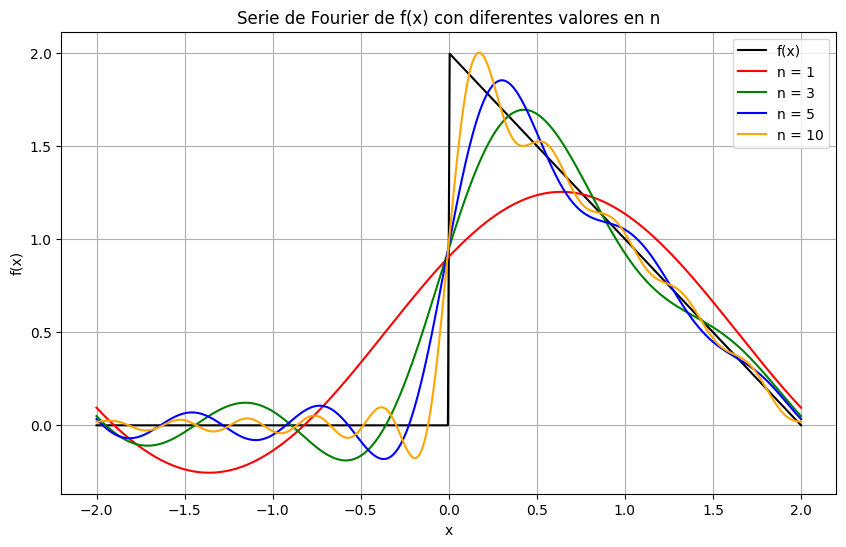

Resultados para n_max = 1:
a0: 0.9989989989989991
an: [0.4048797835019472]
bn: [0.6359842008422202]
Resultados para n_max = 3:
a0: 0.9989989989989991
an: [0.4048797835019472, -1.001010900336663e-06, 0.04498693920568325]
bn: [0.6359842008422202, 0.31799367279887625, 0.2119975289684503]
Resultados para n_max = 5:
a0: 0.9989989989989991
an: [0.4048797835019472, -1.001010900336663e-06, 0.04498693920568325, -1.001040599107883e-06, 0.016195511664516354]
bn: [0.6359842008422202, 0.31799367279887625, 0.2119975289684503, 0.15899998120939585, 0.12720187189920973]
Resultados para n_max = 10:
a0: 0.9989989989989991
an: [0.4048797835019472, -1.001010900336663e-06, 0.04498693920568325, -1.001040599107883e-06, 0.016195511664516354, -1.0010900997163563e-06, 0.0082631795900805, -1.001159406025312e-06, 0.0049988454067201385, -1.0012485235928043e-06]
bn: [0.6359842008422202, 0.31799367279887625, 0.2119975289684503, 0.15899998120939585, 0.12720187189920973, 0.1060034818352297, 0.09086207422046325, 0.07950

In [13]:
# prompt: del codigo de arriba, ajusta para que en la grafica se vean varias graficas de colores

import numpy as np
import matplotlib.pyplot as plt

# Definición de la función f(x)
def f(x):
  """
  Define la función por partes f(x).
  """
  if -2 <= x < 0:
    return 0
  elif 0 <= x <= 2:
    return 2 - x
  else:
    return 0  # Valor por defecto fuera del intervalo [-2, 2]

# Parámetros para la Serie de Fourier
L = 2  # Periodo de la función
n_max_values = [1, 3, 5, 10]  # Diferentes números de términos para graficar

# Cálculo de los coeficientes de Fourier para cada n_max
results = []
for n_max in n_max_values:
    a0 = (1 / L) * np.trapz([f(x) for x in np.linspace(-L, L, 1000)], dx=2*L/1000)

    an = []
    bn = []
    for n in range(1, n_max + 1):
        an_n = (1 / L) * np.trapz([f(x) * np.cos(n * np.pi * x / L) for x in np.linspace(-L, L, 1000)], dx=2*L/1000)
        bn_n = (1 / L) * np.trapz([f(x) * np.sin(n * np.pi * x / L) for x in np.linspace(-L, L, 1000)], dx=2*L/1000)
        an.append(an_n)
        bn.append(bn_n)

    results.append((a0, an, bn, n_max))

# Función para aproximar f(x)
def fourier_series(x, a0, an, bn, n_max, L):
    f_approx = a0 / 2
    for n in range(n_max):
        f_approx += an[n] * np.cos((n + 1) * np.pi * x / L) + bn[n] * np.sin((n + 1) * np.pi * x / L)
    return f_approx

# Genera los datos para graficar
x_vals = np.linspace(-2, 2, 400)
y_vals = [f(x) for x in x_vals]

# Grafica
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x)", color='black') # Función original en negro

colors = ['red', 'green', 'blue', 'orange'] #Colores para las diferentes aproximaciones
for i, (a0, an, bn, n_max) in enumerate(results):
    y_approx = [fourier_series(x, a0, an, bn, n_max, L) for x in x_vals]
    plt.plot(x_vals, y_approx, label=f"n = {n_max}", color=colors[i])

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Serie de Fourier de f(x) con diferentes valores en n")
plt.legend()
plt.grid(True)
plt.show()

for i, (a0, an, bn, n_max) in enumerate(results):
    print(f"Resultados para n_max = {n_max}:")
    print(f"a0: {a0}")
    print(f"an: {an}")
    print(f"bn: {bn}")
